In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import ipywidgets as widgets
from ipywidgets import interact
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# Function to generate and plot the data
def generate_moons(N, noise):
    # Generate the data
    X, y = make_moons(n_samples=N, noise=noise, random_state=42)
    return X, y

def plot_moons(N, noise):
    # Generate the data
    X, y = generate_moons(N, noise)
    # Create a figure
    plt.figure(figsize=(10, 4))
    # Create a scatter plot
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='plasma')
    plt.title('Moons Data Set')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    # Show the plot
    plt.show()

# Create interactive widgets
N_slider = widgets.IntSlider(value=110, min=50, max=250, step=25, description='N')
noise_slider = widgets.FloatSlider(value=0.15, min=0, max=1, step=0.05, description='Noise')

# Use interact to create an interactive plot
interact(plot_moons, N=N_slider, noise=noise_slider)

# Extract dataset for future use
N_value = 110  # or any value you want
noise_value = 0.15  # or any value you want
X, y = generate_moons(N=N_value, noise=noise_value)

# Now X_final and y_final can be used for further processing outside the function


interactive(children=(IntSlider(value=110, description='N', max=250, min=50, step=25), FloatSlider(value=0.15,…

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=10,
                                                    test_size=10)
X_train.shape, X_test.shape

((100, 2), (10, 2))

In [5]:
X_test

array([[ 1.06657291, -0.38380489],
       [-0.03209814,  0.44019721],
       [-0.87958355,  0.38491288],
       [ 0.35603611,  0.82981827],
       [ 0.30259693,  1.01169533],
       [-0.00318764,  0.08366961],
       [-0.91884115,  0.73765809],
       [-0.52076003,  0.5814148 ],
       [ 0.90116873,  0.20276702],
       [ 0.79864396,  0.3578421 ]])

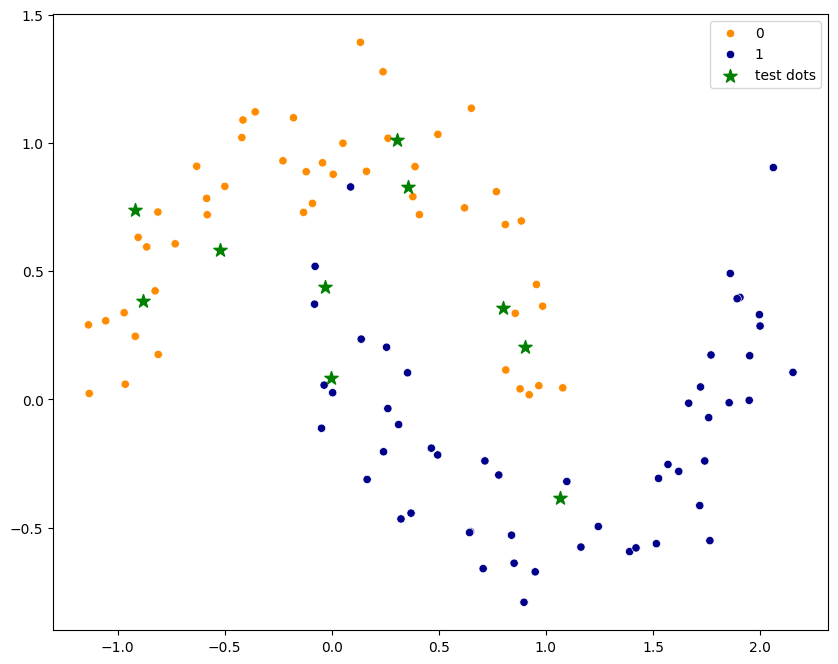

In [4]:
# Create color maps
cmap_bold = ["darkorange", "darkblue"]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_train[:, 0],
    y=X_train[:, 1],
    hue=y_train,
    palette=cmap_bold
)
plt.scatter(X_test[:, 0], X_test[:, 1],
            c='g',
            marker='*',
            s=100,
            label='test dots')
plt.legend();

In [7]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 20
model = KNeighborsClassifier(n_neighbors=n_neighbors,
                             weights='distance')

In [8]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20, weights='distance')

In [9]:
pred_test = model.predict(X_test)
display(pred_test, y_test)

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0])

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [18]:
idx = 0
test_dot = X_test[idx]
distances_list=[]
# Loop through the training data
for i, train_dot in enumerate(X_train):
    # Calculate the distance and store it in the list
    distances_list.append({
        'train_idx': i,
        'label': y_train[i],
        'dst': np.linalg.norm(train_dot - test_dot, ord=2)
    })

# Convert the list of dictionaries to a DataFrame
distances = pd.DataFrame(distances_list)
distances

,train_idx,label,dst
0,0,0,2.217095
1,1,1,1.627919
2,2,0,1.958378
3,3,1,1.181719
4,4,0,1.094778
...,...,...,...
95,95,0,1.574928
96,96,0,2.133678
97,97,1,0.595949
98,98,1,0.404413


In [11]:
nearest_neigbors = distances.sort_values('dst').head(n_neighbors).index
nearest_neigbors

Index([64, 67, 73, 5, 39, 16, 13, 28, 70, 98, 59, 82, 58, 85, 89, 68, 71, 7,
       74, 20],
      dtype='int64')

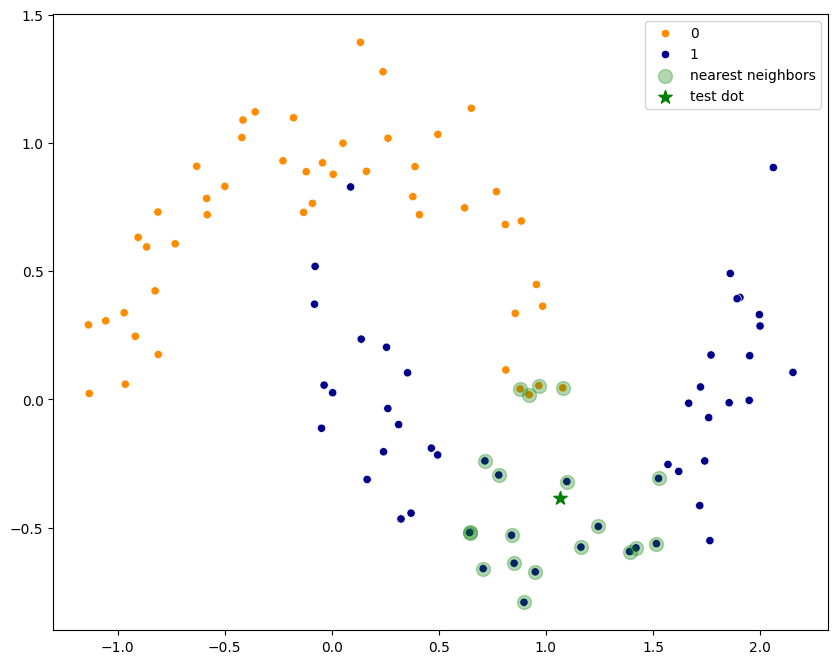

In [13]:
# Create color maps
cmap_bold = ["darkorange", "darkblue"]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_train[:, 0],
    y=X_train[:, 1],
    hue=y_train,
    palette=cmap_bold
)

plt.scatter(X_train[nearest_neigbors, 0], X_train[nearest_neigbors, 1],
            c='g', alpha=0.3, marker='o', s=100, label='nearest neighbors')

plt.scatter(X_test[idx, 0], X_test[idx, 1], c='g', marker='*', s=100, label='test dot')
plt.legend();

In [20]:
distances['weight'] = 1 / distances['dst']
distances = distances.sort_values('dst').head(n_neighbors)
distances

,train_idx,label,dst,weight
64,64,1,0.070701,14.144057
67,67,1,0.210317,4.754720
73,73,1,0.215314,4.644378
5,5,1,0.269957,3.704291
39,39,1,0.300160,3.331560
16,16,1,0.311446,3.210828
13,13,1,0.333728,2.996456
28,28,1,0.379726,2.633479
70,70,1,0.386200,2.589335
98,98,1,0.404413,2.472720


<ipython-input-15-bc6cbb17cb7b>:2: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x, 1/(x))


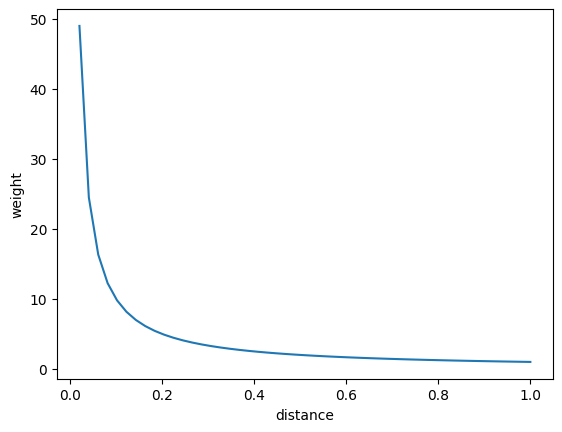

In [15]:
x = np.linspace(0, 1, 50)
plt.plot(x, 1/(x))
plt.ylabel('weight')
plt.xlabel('distance');

In [21]:
display(f"weight class 0 - {distances[distances['label'] == 0]['weight'].sum()}",
        f"weight class 1 - {distances[distances['label'] == 1]['weight'].sum()}")

'weight class 0 - 9.055956484525517'

'weight class 1 - 57.69538335252798'